# <a href="https://colab.research.google.com/github/tvml/ml2021/blob/main/codici/BetaBernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequenza di plot della distribuzione a posteriori del parametro di una distribuzione di Bernoulli al crescere del numero di osservazioni (lanci di moneta)

In [1]:
#%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#!pip install xarray
import xarray

In [3]:
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Fissa la probabilità $\theta$ di esito pari a $1$ e i numeri di osservazioni da considerare

In [4]:
theta_real = 0.26
n_trials = 100000

Genera la sequenza casuale di risultati derivanti da lanci ripetuti con probabilità di $1$ pari a $\theta$

In [5]:
data = stats.bernoulli.rvs(theta_real, size=n_trials)

In [6]:
data[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

Fissa la distribuzione a priori del parametro $\theta$. Si utilizza un modello Beta-Bernoulli, per cui la prior (e di conseguenza la posterior) sono distribuzioni Beta. 

![Diagramma modello beta-bernoulli.](assets/betabernoulli.png)

In [7]:
# dichiara la distribuzione prior
dist = stats.beta
# valori dei suoi parametri
alpha = 20
beta = 10
hyper = [alpha, beta]

Calcola i valori della densità di probabilità a priori su una griglia ($1$-dimensionale) di punti

In [8]:
# fissa l'insieme dei valori sui quali calcolare la distribuzione
nv = 10000
x = np.linspace(0, 1, nv)
# calcola i valori di densità di probabilità per tutti i punti dell'insieme
yp = dist.pdf(x,*hyper)

Plot della distribuzione a priori di $\theta$

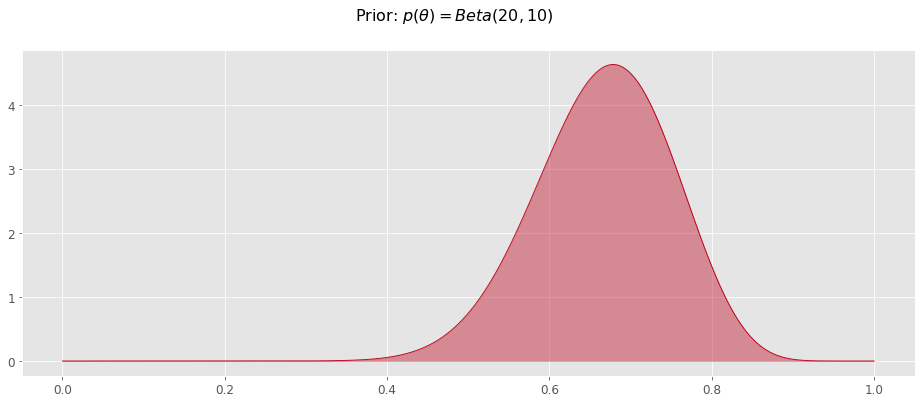

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
ax=plt.subplot(1,1,1)
ax.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
ax.fill_between(x, 0, yp, color=colors[7], alpha=0.4)
# testo sull'asse x
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout
# titolo della figura
plt.suptitle(r'Prior: $p(\theta)=Beta({0:3d}, {1:3d})$'.format(alpha, beta), fontsize=16)
plt.show()

Per ogni numero di osservazioni fissato, determina il numero di valori $1$ osservati, calcola i parametri della distribuzione a posteriori risultante e memorizza il valore della verosimiglianza e della densità di probabilità per tutti i punti della griglia.

In [11]:
n = 500

In [12]:
# determina numero di esiti pari a 1
ones = data[:n].sum()
# modifica i parametri della distribuzione per tener conto degli esiti osservati
params = [sum(t) for t in zip(hyper, [ones, n-ones])]
# calcola elenco dei valori per la distribuzione a posteriori con i parametri calcolati
post = dist.pdf(x, *params)
# calcola il valore sulla griglia per cui la distribuzione a posteriori è massima
mp = x[np.argmax(post)]
# calcola elenco dei valori per la verosimiglianza con la probabilità considerata
lik = [p**ones*(1-p)**(n-ones) for p in x]
# calcola il valore sulla griglia per cui la verosimiglianza è massima
ml = x[np.argmax(lik)]
# calcola il valore dell'evidenza
ev = np.sum(list(map(lambda x,y:x*y/float(nv), lik, yp)))

Visualizza la distribuzione a priori, la verosimiglianza e la distribuzione a posteriori per il numero di osservazioni considerato

In [13]:
def plot_dist():
    fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(16,10))
    ax1.plot(x, lik, '-', c=colors[1], linewidth=0.9, alpha=0.8)
    # riempie la zona compresa tra la curva e l'asse x
    ax1.fill_between(x, 0, lik, color=colors[1], alpha=0.3)
    # testo sull'asse x
    plt.xlabel(r"$\theta$",fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax1.set_title(r'Likelihood; $L(\theta|X)=\theta^{%3d}(1-\theta)^{%3d}\qquad$ ML=%8.5f'%(ones, n-ones, ml), fontsize=14)
    plt.tight_layout
    # effettua il plot a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate 
    # nell'elemento attuale di ys
    ax2.plot(x, post, '-', c=colors[3], linewidth=0.9, alpha=1)
    # riempie la zona compresa tra la curva e l'asse x
    ax2.fill_between(x, 0, post, color=colors[3], alpha=0.6)
    # effettua il plot del prior a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate in yp
    ax2.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
     # riempie la zona compresa tra la curva e l'asse x
    ax2.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
    plt.annotate(r'Evidence; $p(X)={0:10.3e}$'.format(ev), xy=(.05, .85), va='top', xycoords='axes fraction', 
                 fontsize=10)
    # testo sull'asse x
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(r'Posterior; $p(\theta|X)=Beta({0:3d}, {1:3d})\qquad$ MAP={2:8.5f}'.format(params[0],params[1],mp), fontsize=14)
    plt.tight_layout
    # titolo della figura
    plt.suptitle(r'$\theta={0:3.2f}\qquad n={1:3d}\qquad\#1={2:3d}\quad \#0={3:3d}$'.format(theta_real, 
                                                    n, ones, n-ones), fontsize=16)
    plt.show()

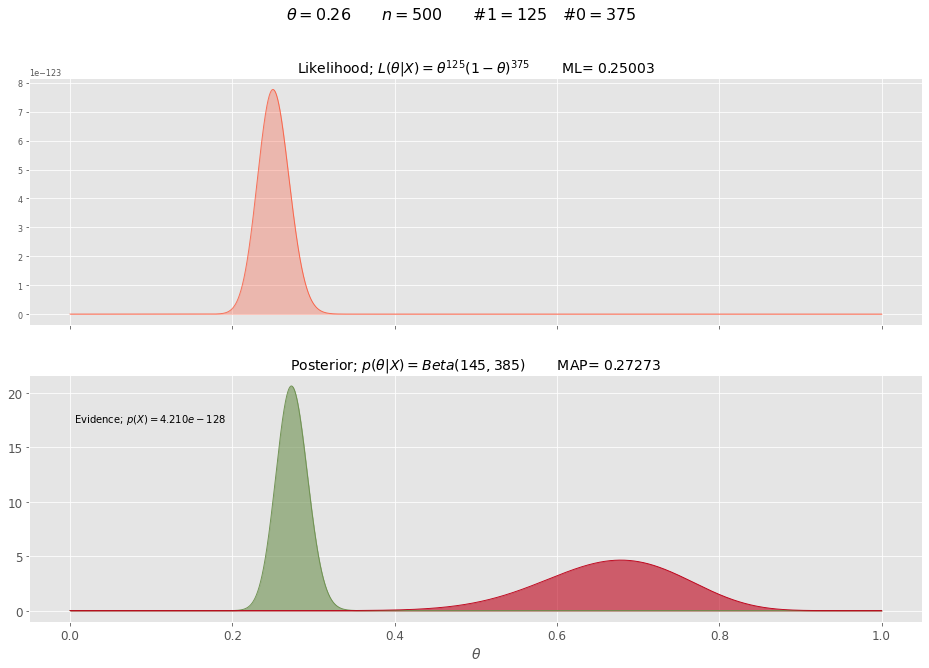

In [14]:
plot_dist()

In [16]:
import pymc3 as pm
import arviz as az
import seaborn as sns


You can find the C code in this temporary file: /var/folders/ny/mqy36hy55r3c22qq88f88lbm0000gn/T/theano_compilation_error_n6wqqmiv
library System is not found.


AttributeError: partially initialized module 'theano' has no attribute 'gof' (most likely due to a circular import)

In [14]:
pm.__version__

'3.11.4'

In [15]:
with pm.Model() as model:
    # a priori
    theta = pm.Beta('theta', alpha=1, beta=1)
    # likelihood
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 55 seconds.


In [25]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    theta    (chain, draw) float64 0.2635 0.2641 0.2649 ... 0.2642 0.2642 0.2624
Attributes:
    created_at:                 2021-04-01T13:25:27.803168
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.0
    sampling_time:              60.99606108665466
    tuning_steps:               1000

In [27]:
trace.posterior.theta[0,:]

<xarray.DataArray 'theta' (draw: 1000)>
array([0.26350598, 0.26408558, 0.26486321, 0.26358986, 0.2632021 ,
       0.26365363, 0.26171031, 0.25937291, 0.26266577, 0.25964797,
       0.26444484, 0.26531992, 0.26175757, 0.26246219, 0.2609494 ,
       0.26116426, 0.26215027, 0.26154631, 0.26154631, 0.26058537,
       0.26122031, 0.26176997, 0.26301686, 0.26313842, 0.26289326,
       0.26298928, 0.2639767 , 0.26442284, 0.2637258 , 0.26262493,
       0.26320463, 0.2637792 , 0.26320177, 0.26314047, 0.26349955,
       0.26468514, 0.26265398, 0.26265398, 0.26290317, 0.26329498,
       0.2625042 , 0.2625042 , 0.26273875, 0.25976093, 0.26226466,
       0.26241251, 0.26243831, 0.2618892 , 0.26206359, 0.2614909 ,
       0.26204406, 0.26204406, 0.26269162, 0.26266553, 0.2605704 ,
       0.26152317, 0.26322603, 0.26365718, 0.26392991, 0.2628013 ,
       0.2628013 , 0.26155924, 0.26100837, 0.26271982, 0.26268602,
       0.26405101, 0.26355378, 0.26350108, 0.26350108, 0.2638877 ,
       0.26401972, 0.26396141, 0.26315809, 0.26217835, 0.26140004,
       0.26218077, 0.2616525 , 0.26230948, 0.26172766, 0.26208169,
       0.26179512, 0.26273466, 0.26345702, 0.26355568, 0.26393027,
       0.2641192 , 0.26229997, 0.26210123, 0.26234909, 0.26357124,
       0.26357124, 0.2642408 , 0.26210436, 0.26084801, 0.2612771 ,
       0.261599  , 0.2618885 , 0.2618885 , 0.26045439, 0.26197324,
...
       0.26354887, 0.26066225, 0.2623783 , 0.2644064 , 0.26499484,
       0.26391782, 0.26212736, 0.26232476, 0.26328808, 0.26282832,
       0.26020398, 0.26100126, 0.26178958, 0.26424423, 0.26471513,
       0.26355196, 0.26289625, 0.26399896, 0.26467108, 0.26394376,
       0.26214587, 0.26268316, 0.26072897, 0.26080353, 0.25965979,
       0.26251943, 0.26106089, 0.2625934 , 0.26174446, 0.26189351,
       0.26477595, 0.26637282, 0.25964561, 0.26014883, 0.26286723,
       0.26408564, 0.26334793, 0.26362363, 0.26362363, 0.26361683,
       0.26509536, 0.26510618, 0.26348345, 0.26242177, 0.2609866 ,
       0.26322742, 0.26309668, 0.26344111, 0.26365866, 0.2619597 ,
       0.26199336, 0.26109975, 0.2621737 , 0.2621737 , 0.2621737 ,
       0.26217044, 0.26238232, 0.26200524, 0.26200524, 0.26079117,
       0.26078372, 0.26222756, 0.26423123, 0.26290836, 0.26321733,
       0.26321733, 0.26302448, 0.26369716, 0.2640486 , 0.26031755,
       0.26424549, 0.26250564, 0.26250564, 0.26098809, 0.26098809,
       0.25971777, 0.26129244, 0.26234922, 0.26234922, 0.26422667,
       0.26591006, 0.26591006, 0.26430215, 0.26151252, 0.26176851,
       0.26199734, 0.264196  , 0.26216736, 0.2617897 , 0.26221313,
       0.26085112, 0.26085112, 0.26173969, 0.26353154, 0.26226061,
       0.26226061, 0.26330166, 0.26330166, 0.26278114, 0.26278114])
Coordinates:
    chain    int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

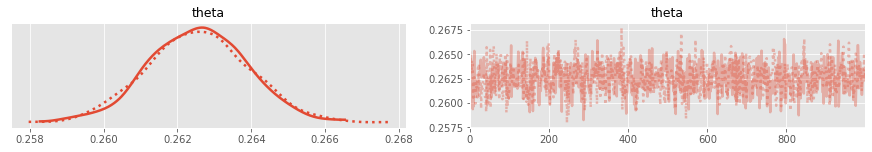

In [28]:
az.plot_trace(trace, var_names=["theta"]);

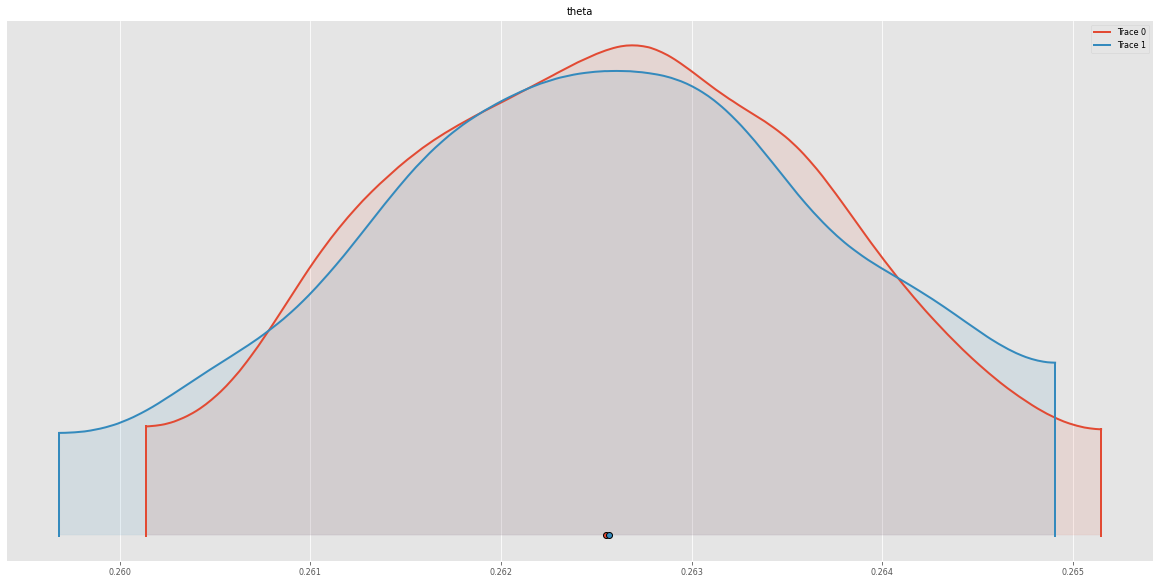

In [29]:
az.plot_density(
    [trace.posterior.theta[0,:],trace.posterior.theta[1,:]],
    data_labels=["Trace 0", "Trace 1"],
    var_names=["theta"],
    shade=0.1,
)
plt.show()

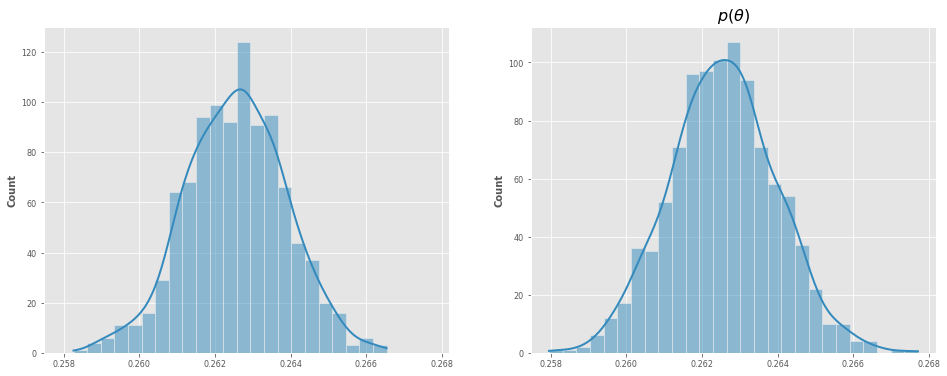

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(16,6))
sns.histplot(ax=ax1, data=trace.posterior.theta[0,:], kde=True)
sns.histplot(ax=ax2, data=trace.posterior.theta[1,:], kde=True)
plt.title(r'$p(\theta)$', fontsize=16)
plt.show()

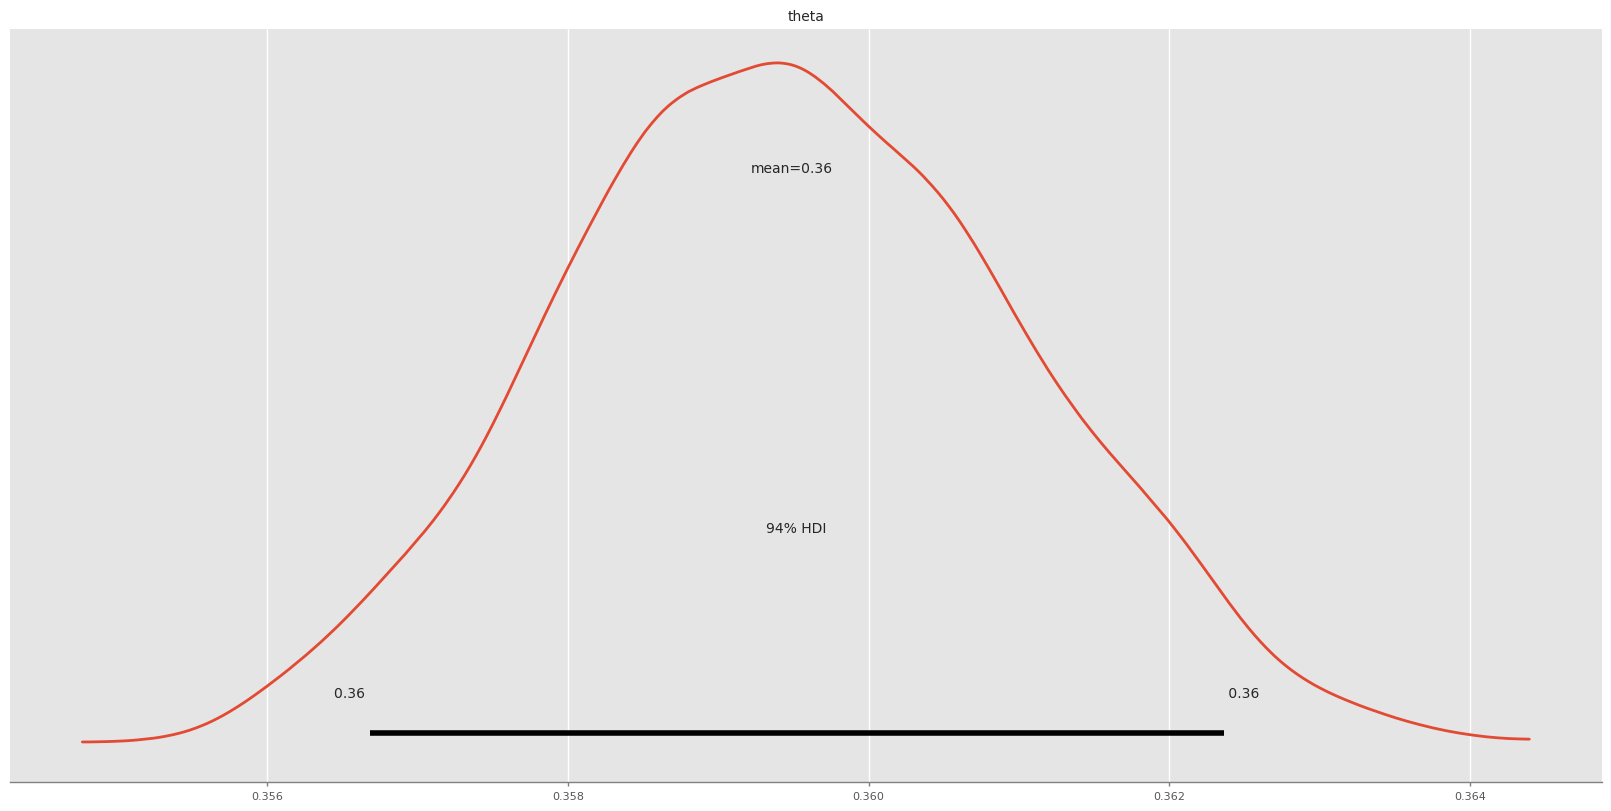

In [118]:
az.plot_posterior(trace, var_names=('theta'));

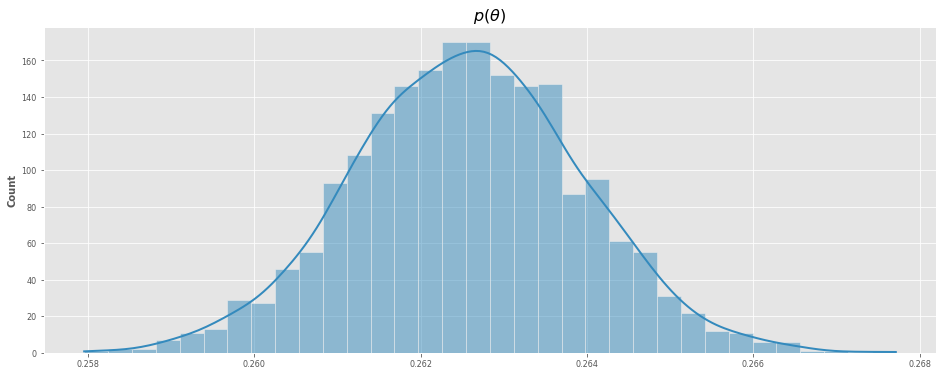

In [31]:
fig = plt.figure(figsize=(16,6))
sns.histplot(data=np.concatenate((trace.posterior.theta[0,:], trace.posterior.theta[1,:])), kde=True)
plt.title(r'$p(\theta)$', fontsize=16)
plt.show()